# Twitter Bot, Sulteng Lawan Covid

A twitter bot to publish latest Covid-19 statistics for Central Sulawesi, Indonesia

## Setup API

In [1]:
import tweepy 
import datetime
import glob
import random
import os
import requests

consumer_key = 'XXX' 
consumer_secret = 'XXX' 
access_token = 'XXX' 
access_token_secret = 'XXX'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## Define Function

In [2]:
import datetime

def tweet(string_input):
    tweettopublish = string_input
    api.update_status(tweettopublish)
    print(tweettopublish)
    
def tweet_reply(string_input, reply_to_id):
    tweettopublish = string_input
    api.update_status(tweettopublish, reply_to_id)
    print(string_input)
    
abspath = os.path.abspath("filename.png")
dname = os.path.dirname(abspath)

os.chdir(dname)

def randomimagetwitt(folder):
    #Takes the folder where your images are as the input and twitts one random file.
    images = glob.glob(folder + "*")
    image_open = images[random.randint(0,len(images))-1]
    print(image_open)
    api.update_with_media(image_open)

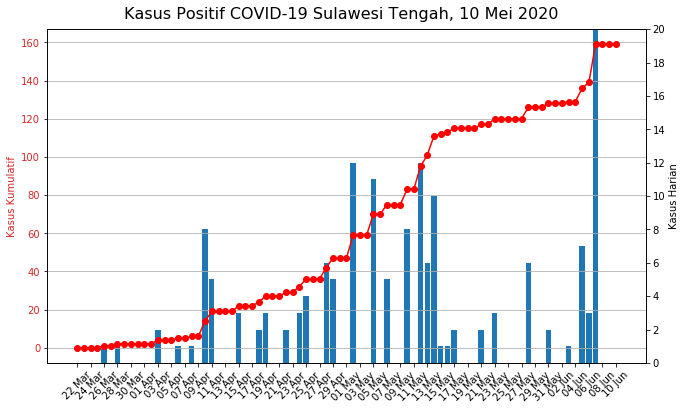

In [3]:
from matplotlib.pyplot import grid
import json
import urllib.request
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)

import matplotlib
import matplotlib.pyplot as plt


url_statistik = "https://banuacoders.com/api/pico/statistik"
data_statistik = urllib.request.urlopen(url_statistik).read().decode()
dict_statistik = json.loads(data_statistik)

nbOfDays = len(dict_statistik['data'])

pure_data = dict_statistik['data'];

total_positive = []
total_recovered = []
total_death = []
total_rawat = []
daily_positive = []
date = []

for i in range(nbOfDays):
    total_positive.append(pure_data[i]['cumulative_positive'])
    total_recovered.append(pure_data[i]['cumulative_recovered'])
    total_death.append(pure_data[i]['cumulative_death'])
    total_rawat.append(pure_data[i]['cumulative_positive']-pure_data[i]['cumulative_death']-pure_data[i]['cumulative_recovered'])
    
    daily_positive.append(pure_data[i]['positive'])
    if(i==52):
        date_with_year = "13 May 2020"
    else:
        date_with_year = pure_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])
            
fig, ax1 = plt.subplots()
fig.suptitle('Kasus Positif COVID-19 Sulawesi Tengah, ' + date_splitted[0] + " Mei " + date_splitted[2], fontsize=16, y = 1)

color = 'tab:red'
ax1.set_ylabel('Kasus Kumulatif', color=color)
ax1.plot(date, total_positive, '-or')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'k'
ax2.set_ylabel('Kasus Harian', color=color)  # we already handled the x-label with ax1
ax2.set_ylim([0, 20])
yint = range(0, 21, 2)
matplotlib.pyplot.yticks(yint)
matplotlib.rcParams.update({'font.size': 10})
ax2.bar(date, daily_positive, color='tab:blue')
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_zorder(1)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.grid(axis='y')
ax1.patch.set_visible(False)
ax2.patch.set_visible(True)

#plt.bar(date, daily_positive)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
xint = range(0, nbOfDays, 2)
matplotlib.pyplot.xticks(xint)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(w=16/1.5,h=9/1.5)
plt.show()

## Sebaran Kabupaten

In [4]:
import json
import urllib.request

url_kab_kota = "https://banuacoders.com/api/pico/kabupaten"
data_kab_kota = urllib.request.urlopen(url_kab_kota).read().decode()
dict_kab_kota = json.loads(data_kab_kota)

positive = []

#print(dict_kab_kota["data"])
kasus_positif_string_header = "["+ date_with_year + "]\n" + "Total Kasus Positif di Sulteng:"
kasus_positif_string = kasus_positif_string_header

for region in dict_kab_kota["data"]:
    nb_positif = str(region["positif"])
    nb_sembuh = str(region["sembuh"])
    nb_meninggal = str(region["meninggal"])
    kasus_positif_string += "\n" + str(region['no']) + ". " + region['kabupaten'] + ": " + nb_positif

In [5]:
kasus_sembuh_string_header = "Total Kasus Positif dan Sembuh di Sulteng:"
kasus_sembuh_string = kasus_sembuh_string_header

for region in dict_kab_kota["data"]:
    nb_sembuh = str(region["sembuh"])
    kasus_sembuh_string += "\n" + str(region['no']) + ". " + region['kabupaten'] + ": " + nb_sembuh
    
#print(kasus_sembuh_string)

In [6]:
kasus_meninggal_string_header = "Total Kasus Positif dan Meninggal di Sulteng:"
kasus_meninggal_string = kasus_meninggal_string_header

for region in dict_kab_kota["data"]:
    nb_meninggal = str(region["meninggal"])
    kasus_meninggal_string += "\n" + str(region['no']) + ". " + region['kabupaten'] + ": " + nb_meninggal
    
twts = api.search(q=kasus_sembuh_string_header)

#print(kasus_meninggal_string)
#print(twts[0].user.screen_name)

In [7]:
kasus_PDP_string_header = "Total Kasus PDP Aktif di Sulteng:"
kasus_PDP_string = kasus_PDP_string_header

for region in dict_kab_kota["data"]:
    nb_PDP = str(region["dalam_pengawasan"])
    kasus_PDP_string += "\n" + str(region['no']) + ". " + region['kabupaten'] + ": " + nb_PDP
    
twts = api.search(q=kasus_meninggal_string_header)

#print(twts[0].user.screen_name)


In [8]:
kasus_ODP_string_header = "Total Kasus ODP Aktif di Sulteng:"
kasus_ODP_string = kasus_ODP_string_header

for region in dict_kab_kota["data"]:
    nb_ODP = str(region["dalam_pemantauan"])
    kasus_ODP_string += "\n" + str(region['no']) + ". " + region['kabupaten'] + ": " + nb_ODP

#print(twts[0].user.screen_name)
#print(kasus_ODP_string)


In [9]:
print(kasus_positif_string)
print(kasus_sembuh_string)
print(kasus_meninggal_string)
print(kasus_PDP_string, twts[0].id)
print(kasus_ODP_string, twts[0].id)

[10 Jun 2020]
Total Kasus Positif di Sulteng:
1. Banggai: 9
2. Banggai Kepulauan: 1
3. Banggai Laut: 1
4. Buol: 56
5. Donggala: 1
6. Morowali: 11
7. Morowali Utara: 14
8. Parigi Mautong: 1
9. Poso: 12
10. Sigi: 3
11. Tojo Una-Una: 0
12. Toli-Toli: 15
13. Kota Palu: 35
Total Kasus Positif dan Sembuh di Sulteng:
1. Banggai: 2
2. Banggai Kepulauan: 1
3. Banggai Laut: 0
4. Buol: 41
5. Donggala: 0
6. Morowali: 7
7. Morowali Utara: 8
8. Parigi Mautong: 0
9. Poso: 11
10. Sigi: 3
11. Tojo Una-Una: 0
12. Toli-Toli: 5
13. Kota Palu: 16
Total Kasus Positif dan Meninggal di Sulteng:
1. Banggai: 0
2. Banggai Kepulauan: 0
3. Banggai Laut: 0
4. Buol: 0
5. Donggala: 0
6. Morowali: 0
7. Morowali Utara: 1
8. Parigi Mautong: 0
9. Poso: 0
10. Sigi: 0
11. Tojo Una-Una: 0
12. Toli-Toli: 0
13. Kota Palu: 3
Total Kasus PDP Aktif di Sulteng:
1. Banggai: 0
2. Banggai Kepulauan: 0
3. Banggai Laut: 0
4. Buol: 0
5. Donggala: 1
6. Morowali: 2
7. Morowali Utara: 9
8. Parigi Mautong: 0
9. Poso: 2
10. Sigi: 0
11. Tojo

In [ ]:
tweet(kasus_positif_string)

twts = api.search(q=kasus_positif_string_header)
tweet_reply(kasus_sembuh_string, twts[0].id)

In [12]:
twts = api.search(q=kasus_sembuh_string_header)
tweet_reply(kasus_meninggal_string, twts[0].id)

twts = api.search(q=kasus_meninggal_string_header)
tweet_reply(kasus_PDP_string, twts[0].id)

twts = api.search(q=kasus_PDP_string_header)
tweet_reply(kasus_ODP_string, twts[0].id)

Total Kasus Positif dan Meninggal di Sulteng:
1. Banggai: 0
2. Banggai Kepulauan: 0
3. Banggai Laut: 0
4. Buol: 0
5. Donggala: 0
6. Morowali: 0
7. Morowali Utara: 1
8. Parigi Mautong: 0
9. Poso: 0
10. Sigi: 0
11. Tojo Una-Una: 0
12. Toli-Toli: 0
13. Kota Palu: 3
Total Kasus PDP Aktif di Sulteng:
1. Banggai: 0
2. Banggai Kepulauan: 0
3. Banggai Laut: 0
4. Buol: 0
5. Donggala: 1
6. Morowali: 2
7. Morowali Utara: 9
8. Parigi Mautong: 0
9. Poso: 2
10. Sigi: 0
11. Tojo Una-Una: 0
12. Toli-Toli: 7
13. Kota Palu: 4
Total Kasus ODP Aktif di Sulteng:
1. Banggai: 0
2. Banggai Kepulauan: 0
3. Banggai Laut: 0
4. Buol: 28
5. Donggala: 16
6. Morowali: 4
7. Morowali Utara: 1
8. Parigi Mautong: 7
9. Poso: 17
10. Sigi: 0
11. Tojo Una-Una: 3
12. Toli-Toli: 196
13. Kota Palu: 8


## Statistik

In [11]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid

url_statistik = "https://banuacoders.com/api/pico/statistik"
data_statistik = urllib.request.urlopen(url_statistik).read().decode()
dict_statistik = json.loads(data_statistik)

nbOfDays = len(dict_statistik['data'])

pure_data = dict_statistik['data'];

total_positive = []
total_recovered = []
total_death = []
total_rawat = []
daily_positive = []
date = []

for i in range(nbOfDays):
    total_positive.append(pure_data[i]['cumulative_positive'])
    total_recovered.append(pure_data[i]['cumulative_recovered'])
    total_death.append(pure_data[i]['cumulative_death'])
    total_rawat.append(pure_data[i]['cumulative_positive']-pure_data[i]['cumulative_death']-pure_data[i]['cumulative_recovered'])
    
    daily_positive.append(pure_data[i]['positive'])
    if(i==52):
        date_with_year = "13 May 2020"
    else:
        date_with_year = pure_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])
        
#positive_add = 159
#recovered_add = 93
#death_add = 4
#total_positive.append(positive_add)
#total_recovered.append(recovered_add)
#total_death.append(death_add)
#total_rawat.append(positive_add-recovered_add-death_add)

#daily_positive.append(2)
#date_with_year = "7 Juni 2020"
#date_splitted = date_with_year.split()
#date.append(date_splitted[0] + date_splitted[1])


